In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import scoring_function

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (15, 8)
plt.rc('axes', axisbelow=True)

In [2]:
y_val = pd.read_feather('y_val.f').set_index('sku').iloc[:, 0]
y_val

sku
11160     25
503364    21
298187     2
460528    18
362265     8
          ..
649893    16
550180    25
285572    20
210030     7
615475    12
Name: inventory_days, Length: 144196, dtype: int64

In [3]:
df_compare = pd.concat([
    
    pd.read_csv('2.1-probs-tuned-lgbm.csv', index_col=0).rename(
        columns={str(i): f'lgbm_{i}' for i in range(30)}
    ),
    
    pd.read_csv('3.1-probs-nn-one-layer-32.csv', index_col=0).rename(
        columns={str(i): f'nn_one_32_{i}' for i in range(30)}
    ),
    
    pd.read_csv('3.2-probs-nn-two-layers-16-16.csv', index_col=0).rename(
        columns={str(i): f'nn_two_16_16_{i}' for i in range(30)}
    )
    
], axis=1) 

df_compare

,lgbm_0,lgbm_1,lgbm_2,lgbm_3,lgbm_4,lgbm_5,lgbm_6,lgbm_7,lgbm_8,lgbm_9,lgbm_10,lgbm_11,lgbm_12,lgbm_13,lgbm_14,lgbm_15,lgbm_16,lgbm_17,lgbm_18,lgbm_19,lgbm_20,lgbm_21,lgbm_22,lgbm_23,lgbm_24,lgbm_25,lgbm_26,lgbm_27,lgbm_28,lgbm_29,nn_one_32_0,nn_one_32_1,nn_one_32_2,nn_one_32_3,nn_one_32_4,nn_one_32_5,nn_one_32_6,nn_one_32_7,nn_one_32_8,nn_one_32_9,nn_one_32_10,nn_one_32_11,nn_one_32_12,nn_one_32_13,nn_one_32_14,nn_one_32_15,nn_one_32_16,nn_one_32_17,nn_one_32_18,nn_one_32_19,nn_one_32_20,nn_one_32_21,nn_one_32_22,nn_one_32_23,nn_one_32_24,nn_one_32_25,nn_one_32_26,nn_one_32_27,nn_one_32_28,nn_one_32_29,nn_two_16_16_0,nn_two_16_16_1,nn_two_16_16_2,nn_two_16_16_3,nn_two_16_16_4,nn_two_16_16_5,nn_two_16_16_6,nn_two_16_16_7,nn_two_16_16_8,nn_two_16_16_9,nn_two_16_16_10,nn_two_16_16_11,nn_two_16_16_12,nn_two_16_16_13,nn_two_16_16_14,nn_two_16_16_15,nn_two_16_16_16,nn_two_16_16_17,nn_two_16_16_18,nn_two_16_16_19,nn_two_16_16_20,nn_two_16_16_21,nn_two_16_16_22,nn_two_16_16_23,nn_two_16_16_24,nn_two_16_16_25,nn_two_16_16_26,nn_two_16_16_27,nn_two_16_16_28,nn_two_16_16_29
0,0.000144,0.000868,0.001437,0.001616,0.004351,0.002389,0.005754,0.010955,0.013879,0.020174,0.008615,0.020971,0.014316,0.016855,0.027848,0.033503,0.031719,0.024838,0.037460,0.040237,0.061693,0.044929,0.057893,0.079527,0.040954,0.073347,0.090349,0.072285,0.087456,0.073636,6.856966e-07,0.000025,0.000279,0.000379,0.001423,0.001303,0.003524,0.006029,0.011858,0.010659,0.017022,0.013750,0.018963,0.023270,0.038909,0.033661,0.046680,0.042200,0.049712,0.042561,0.048361,0.065111,0.060464,0.064551,0.059883,0.053566,0.074606,0.078312,0.060195,0.072746,0.000048,0.000056,0.000159,0.000314,0.000818,0.001351,0.003185,0.005681,0.009672,0.010908,0.014559,0.015109,0.016410,0.022762,0.032168,0.036141,0.042672,0.043086,0.044544,0.046393,0.051039,0.059048,0.064675,0.065153,0.066132,0.061841,0.067388,0.072211,0.079886,0.066590
1,0.004549,0.012467,0.019060,0.014731,0.030311,0.024906,0.023448,0.043170,0.030440,0.043982,0.037385,0.050131,0.031932,0.055106,0.040051,0.035792,0.033437,0.044733,0.024276,0.022889,0.043730,0.035741,0.036868,0.046123,0.044354,0.037953,0.029445,0.028554,0.037526,0.036909,2.004510e-03,0.013419,0.035992,0.039264,0.035876,0.040058,0.043140,0.048107,0.051734,0.052367,0.046335,0.031788,0.032252,0.039875,0.041563,0.036433,0.040927,0.033237,0.029080,0.026507,0.026693,0.035342,0.032953,0.029135,0.028458,0.023126,0.023571,0.028062,0.022168,0.030534,0.000818,0.004048,0.009606,0.014081,0.018223,0.020241,0.026974,0.030070,0.035283,0.037730,0.034935,0.034397,0.032293,0.041703,0.047451,0.045704,0.047878,0.044195,0.038692,0.035661,0.044071,0.045586,0.047634,0.045922,0.043484,0.036333,0.034772,0.039049,0.035246,0.027917
2,0.156303,0.111719,0.091825,0.069296,0.053512,0.056339,0.039659,0.050323,0.039096,0.036703,0.022520,0.024411,0.020150,0.021520,0.019817,0.029439,0.014420,0.013802,0.011760,0.018263,0.011028,0.015241,0.013305,0.009149,0.008972,0.009906,0.007087,0.008144,0.010555,0.005733,1.729079e-01,0.113795,0.092218,0.073754,0.055743,0.047881,0.048868,0.049117,0.046494,0.040757,0.027316,0.021073,0.021641,0.023803,0.020692,0.019520,0.017418,0.013308,0.011933,0.009756,0.010851,0.011232,0.009490,0.008269,0.006631,0.005325,0.005468,0.006139,0.004775,0.003829,0.126650,0.113939,0.090820,0.071759,0.059580,0.051869,0.051901,0.050999,0.050279,0.042227,0.031486,0.025233,0.022983,0.027207,0.026982,0.022278,0.017933,0.015139,0.013290,0.010707,0.011594,0.009933,0.009874,0.009370,0.007807,0.005357,0.005099,0.006693,0.005607,0.005403
3,0.018818,0.033109,0.059856,0.039888,0.054099,0.056896,0.042900,0.043629,0.032087,0.058471,0.040710,0.030997,0.026143,0.033443,0.026618,0.025270,0.031997,0.018931,0.017218,0.020277,0.033893,0.021910,0.041516,0.024652,0.024994,0.027158,0.016913,0.017079,0.043477,0.037053,3.813723e-02,0.082920,0.097704,0.065823,0.069160,0.047426,0.050873,0.055836,0.049724,0.052337,0.041544,0.027310,0.031248,0.027198,0.026995,0.022149,0.028659,0.020474,0.019572,0.017137,0.013093,0.0195

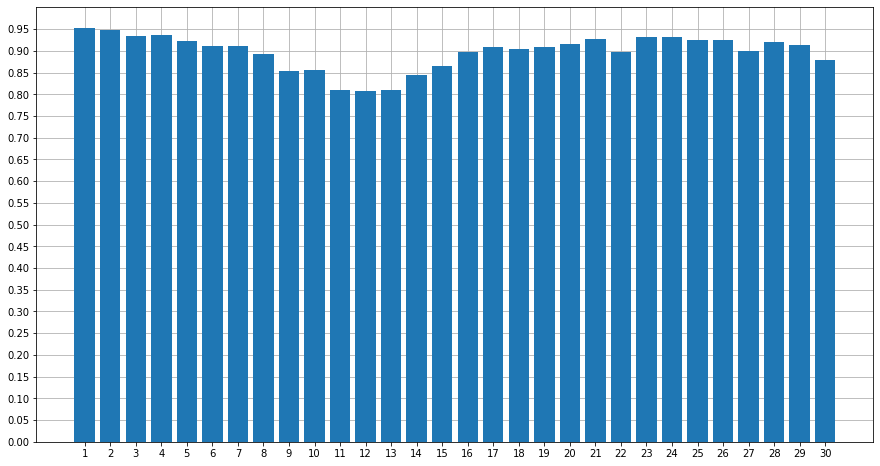

In [4]:
# diversity
corrs = []
for i in range(30):
    corrs.append(df_compare[[f'lgbm_{i}', f'nn_one_32_{i}']].corr().values[1][0])
    
plt.bar(range(1, 31), corrs)
plt.xticks(range(1, 31))
plt.yticks(np.arange(0, 1, 0.05))
plt.grid();

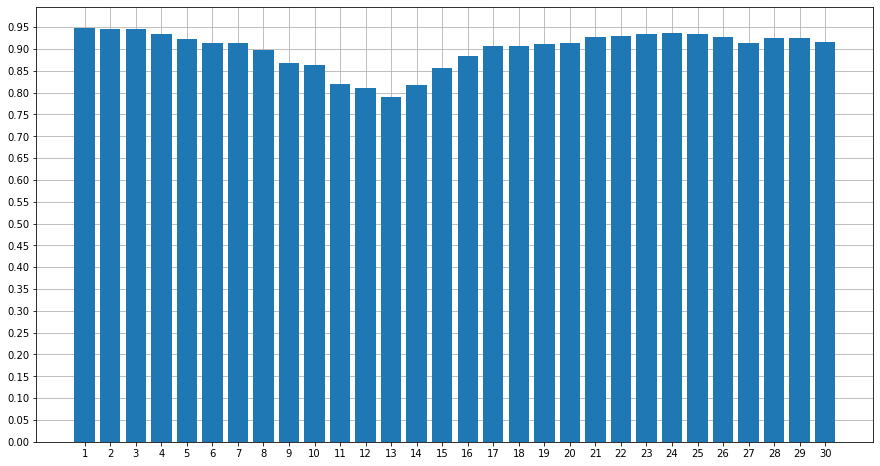

In [5]:
# diversity
corrs = []
for i in range(30):
    corrs.append(df_compare[[f'lgbm_{i}', f'nn_two_16_16_{i}']].corr().values[1][0])
    
plt.bar(range(1, 31), corrs)
plt.xticks(range(1, 31))
plt.yticks(np.arange(0, 1, 0.05))
plt.grid();

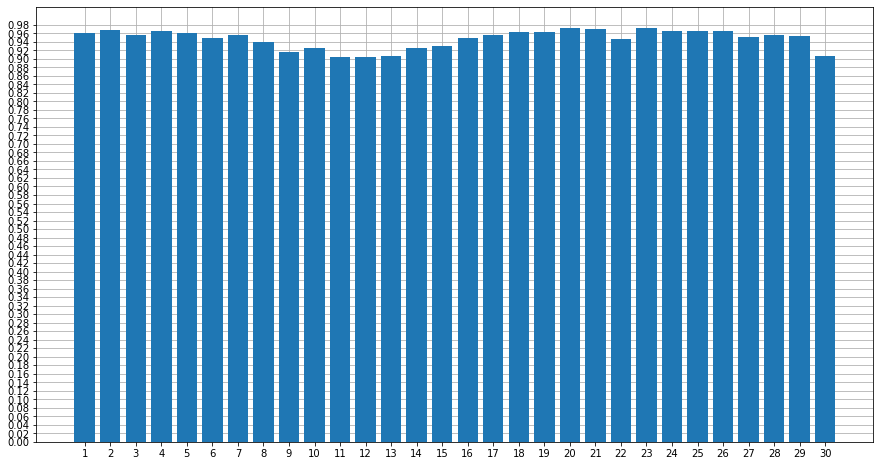

In [6]:
# diversity
corrs = []
for i in range(30):
    corrs.append(df_compare[[f'nn_one_32_{i}', f'nn_two_16_16_{i}']].corr().values[1][0])
    
plt.bar(range(1, 31), corrs)
plt.xticks(range(1, 31))
plt.yticks(np.arange(0, 1, 0.02))
plt.grid();

In [7]:
weights = list(zip(1 - np.linspace(0, 0.99, 100), np.linspace(0, 0.99, 100)))
weights[:10]

[(1.0, 0.0),
 (0.99, 0.01),
 (0.98, 0.02),
 (0.97, 0.03),
 (0.96, 0.04),
 (0.95, 0.05),
 (0.94, 0.06),
 (0.9299999999999999, 0.07),
 (0.92, 0.08),
 (0.91, 0.09)]

In [8]:
%%time

# weight average
rps_weights = []
for ws in weights:
    rps_weights.append(
        scoring_function(
            y_val + 1,
            np.average([
                np.array(df_compare.iloc[:, :30].values), # LGBM
                # np.array(df_compare.iloc[:, 30:60].values), # NN one layer (32)
                np.array(df_compare.iloc[:, 60:].values) # NN two layers (16, 16)
            ], axis=0, weights=ws)
        )
    )

CPU times: user 12.1 s, sys: 3.11 s, total: 15.3 s
Wall time: 15.6 s


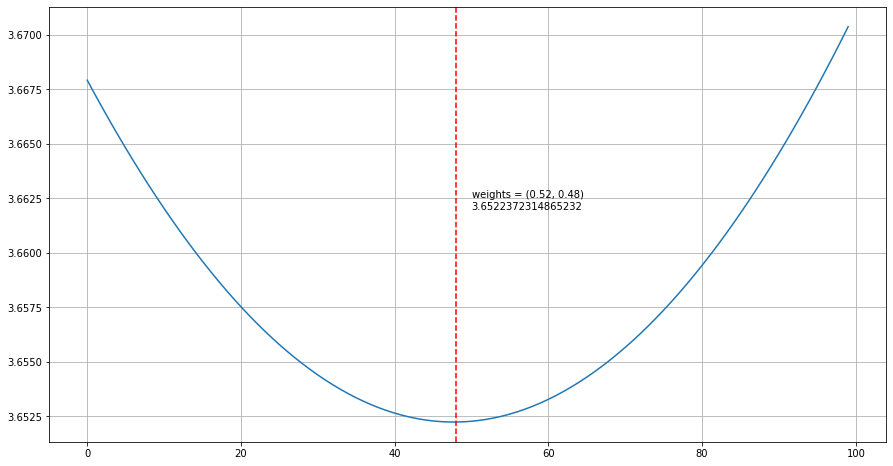

In [9]:
plt.plot(rps_weights)
plt.axvline(x=np.argmin(rps_weights), c='red', linestyle='--')
plt.text(x=50, y = 3.662, s='weights = ' + str(weights[np.argmin(rps_weights)]) + '\n' + str(rps_weights[np.argmin(rps_weights)]))
plt.grid();

In [10]:
rps_weights[np.argmin(rps_weights)]

3.6522372314865232

- LGBM: 3.6679233366046873


- NN one layer (32): 3.678533428175507


- NN two layers (16, 16): 3.671092105352449

## Averaging submissions

In [11]:
# using LGBM and the the second NN
sub = np.average([
    pd.read_csv('2-tuned-lgbm.csv.gz', header=None).values,
    pd.read_csv('3.2-nn-two-layers-16-16.csv.gz', header=None).values
], axis=0, weights=[0.52, 0.48])

X_test_sub = pd.DataFrame(sub).astype(float).round(4)
X_test_sub

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0077,0.0170,0.0247,0.0335,0.0344,0.0408,0.0528,0.0571,0.0578,0.0587,0.0490,0.0431,0.0416,0.0496,0.0549,0.0469,0.0443,0.0379,0.0318,0.0293,0.0304,0.0287,0.0271,0.0244,0.0211,0.0147,0.0119,0.0134,0.0093,0.0059
1,0.0049,0.0134,0.0225,0.0322,0.0377,0.0511,0.0571,0.0606,0.0597,0.0602,0.0501,0.0453,0.0410,0.0481,0.0517,0.0479,0.0450,0.0374,0.0296,0.0309,0.0274,0.0276,0.0254,0.0201,0.0214,0.0150,0.0131,0.0104,0.0089,0.0045
2,0.0772,0.2107,0.1799,0.1414,0.0727,0.0545,0.0420,0.0388,0.0304,0.0207,0.0162,0.0148,0.0100,0.0117,0.0116,0.0087,0.0088,0.0053,0.0048,0.0059,0.0058,0.0045,0.0045,0.0041,0.0035,0.0025,0.0025,0.0026,0.0021,0.0015
3,0.0138,0.0493,0.0974,0.0890,0.0902,0.0645,0.0656,0.0688,0.0611,0.0496,0.0392,0.0365,0.0297,0.0349,0.0320,0.0236,0.0263,0.0181,0.0133,0.0142,0.0149,0.0113,0.0116,0.0107,0.0079,0.0068,0.0058,0.0067,0.0045,0.0027
4,0.0034,0.0096,0.0151,0.0208,0.0288,0.0303,0.0479,0.0497,0.0509,0.0480,0.0437,0.0391,0.0409,0.0466,0.0520,0.0501,0.0506,0.0393,0.0335,0.0341,0.0381,0.0390,0.0385,0.0309,0.0268,0.0247,0.0214,0.0212,0.0154,0.0099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,0.0004,0.0028,0.0022,0.0044,0.0080,0.0070,0.0117,0.0104,0.0212,0.0234,0.0227,0.0249,0.0304,0.0327,0.0390,0.0340,0.0469,0.0499,0.0383,0.0389,0.0492,0.0560,0.0615,0.0637,0.0640,0.0552,0.0434,0.0625,0.0564,0.0390
551468,0.0002,0.0016,0.0013,0.0048,0.0040,0.0050,0.0072,0.0073,0.0218,0.0193,0.0186,0.0226,0.0245,0.0312,0.0372,0.0327,0.0446,0.0511,0.0383,0.0434,0.0529,0.0566,0.0615,0.0681,0.0704,0.0551,0.0474,0.0712,0.0531,0.0472
551469,0.0008,0.0031,0.0051,0.0090,0.0175,0.0120,0.0196,0.0185,0.0338,0.0298,0.0284,0.0282,0.0288,0.0379,0.0390,0.0353,0.0514,0.0457,0.0377,0.0427,0.0369,0.0451,0.0490,0.0559,0.0640,0.0395,0.0398,0.0553,0.0498,0.0403
551470,0.0064,0.0331,0.0243,0.0179,0.0387,0.0260,0.0419,0.0260,0.0519,0.0351,0.0311,0.0302,0.0295,0.0379,0.0360,0.0316,0.0543,0.0381,0.0326,0.0270,0.0286,0.0391,0.0352,0.0402,0.0414,0.0336,0.0265,0.0370,0.0349,0.0339


In [12]:
X_test_sub.sum(axis=1).value_counts().sort_index()

0.9993        1
0.9993        3
0.9993        2
0.9994        2
0.9994       21
0.9994       20
0.9994       33
0.9994       10
0.9994        2
0.9995        1
0.9995        9
0.9995       34
0.9995      115
0.9995      229
0.9995      222
0.9995      119
0.9995       31
0.9995        5
0.9996        4
0.9996       18
0.9996       47
0.9996      207
0.9996      743
0.9996     1513
0.9996     2314
0.9996      893
0.9996      204
0.9996       39
0.9996        2
0.9997        1
0.9997        9
0.9997       29
0.9997      131
0.9997      717
0.9997     2829
0.9997     6264
0.9997     7373
0.9997     4123
0.9997     1248
0.9997      215
0.9997       14
0.9997        2
0.9998        1
0.9998       15
0.9998       60
0.9998      360
0.9998     1808
0.9998     7475
0.9998    16744
0.9998    20608
0.9998    11643
0.9998     3720
0.9998      704
0.9998       75
0.9998        5
0.9999        1
0.9999        7
0.9999       37
0.9999      121
0.9999      532
0.9999     2737
0.9999    11421
0.9999  

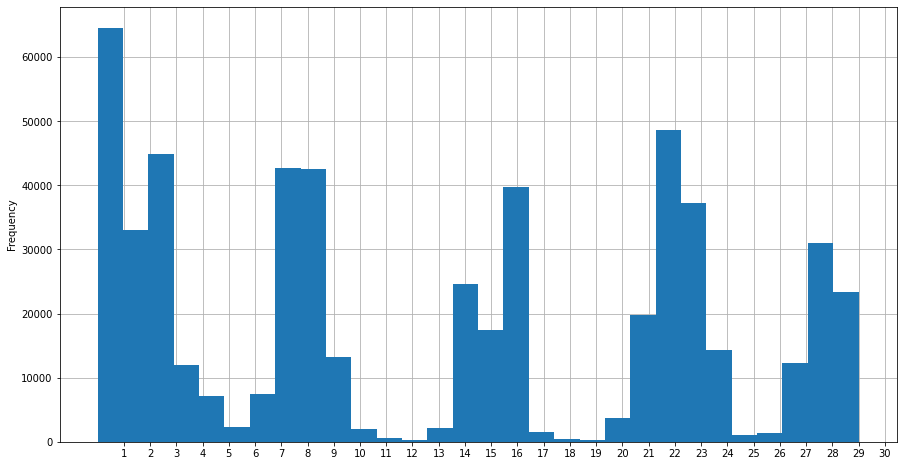

In [13]:
X_test_sub.idxmax(axis=1).plot.hist(bins=30)
plt.xticks(range(1, 31))
plt.grid();

In [14]:
%%time

X_test_sub.to_csv(
    '4-average_predictions-2-tuned-lgbm-3.2-nn-two-layers-16-16-weights-052-048.csv.gz',
    compression='gzip',
    index=False,
    header=False
)

CPU times: user 2min 17s, sys: 1.07 s, total: 2min 18s
Wall time: 2min 23s


- CV: 3.65223
- Public LB: 3.76937
- Private LB: 3.77443